# 葡萄酒分类

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn import preprocessing
%matplotlib inline

In [3]:
path = '/Users/sunlu/Workspaces/PyCharm/TensorflowDiary/MachineLearning/Nolinear/wine.csv'
df = pd.read_csv(path, header=0)
print(df.describe())
print(df.head(5))

             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

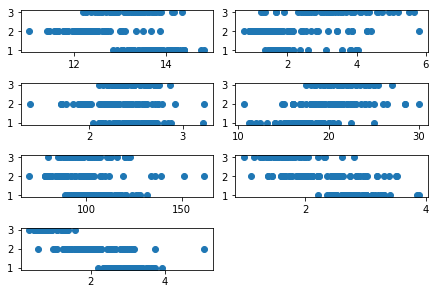

In [6]:
for i in range(1,8):
    number = 420 + i
    ax1 = plt.subplot(number)
    ax1.locator_params(nbins=3)
    plt.title
    ax1.scatter(df[df.columns[i]], df['Wine']) # Plot a scatter draw of the datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [8]:
sess = tf.InteractiveSession()

X = df[df.columns[1:13]].values
y = df['Wine'].values - 1
Y = tf.one_hot(indices=y, depth=3, on_value=1., off_value=0., axis=1, name="a").eval()

X, Y = shuffle(X, Y)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# 创建模型
x = tf.placeholder(tf.float32, [None, 12])
W = tf.Variable(tf.zeros([12, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 定义损失函数和优化器
y_ = tf.placeholder(tf.float32, [None, 3])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 训练神经网络
tf.initialize_all_variables().run()

for i in range(100):
    X, Y = shuffle(X,Y, random_state=1)
    
    Xtr = X[0:140, :]
    Ytr = Y[0:140, :]
    
    Xt = X[140:178, :]
    Yt = Y[140:178, :]
    Xtr, Ytr = shuffle (Xtr, Ytr, random_state=0)
    #batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xs, batch_ys = Xtr , Ytr
    train_step.run({x: batch_xs, y_: batch_ys})
    cost = sess.run (cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})
    # 测试训练好的模型
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval({x: Xt, y_: Yt}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.


0.92105263


0.94736844
0.94736844
1.0
0.92105263
0.9736842


0.94736844
0.94736844


0.8947368
0.92105263
0.9736842


1.0


0.9736842
0.9736842
0.94736844


0.9736842
0.94736844
0.94736844
0.94736844
1.0


0.9736842
1.0
0.94736844
1.0
0.9736842
0.9736842
1.0
0.92105263


0.92105263
1.0
0.94736844
0.9736842
0.9736842
0.92105263


0.9736842
0.94736844
0.94736844
0.92105263
0.9736842


0.9736842
0.94736844
1.0
0.94736844
0.94736844
0.94736844


0.9736842
0.9736842
0.9736842
1.0
0.92105263
0.94736844


0.9736842
1.0
1.0
0.9736842


1.0
1.0
0.9736842


1.0
0.94736844
1.0
0.9736842


0.9736842
1.0
0.9736842


0.9736842
0.9736842
1.0


1.0
0.94736844
0.94736844


1.0
0.9736842
0.9736842


1.0
0.94736844
1.0
0.9736842


1.0
1.0
0.8947368
0.9736842


1.0
0.9736842
1.0
0.9736842


0.9736842
0.9736842
0.94736844


0.9736842
0.9736842
1.0
0.9736842


0.94736844
1.0
0.9736842


0.9736842
0.9736842
1.0


0.9736842
